In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import voigt_profile
from scipy.stats import norm
import math

### Non relativistic Breit-Wigner 
## $\frac{\Gamma/2\pi}{(M-M_0)^2 + \Gamma^2/4}$

---

### Relativistic Breit Wigner
## $\frac{k}{(M^2-M_0^2)^2+M^2\Gamma^2}$
with <br>
### $k=\frac{2\sqrt{2}M\Gamma\gamma}{\pi\sqrt{M^2+\gamma}}~~~~~ \gamma=\sqrt{M^2(M^2+\Gamma^2)}$

In [12]:
# Non relativistic Breit Wigner
# k/{(M-M0)**2 + (Gamma/2)**2} with k=Gamma/(2*pi)
# FWHM = Gamma
def nonR_BW(e,m,w):
    k     = w/(2*math.pi)
    denom = (e-m)*(e-m) + (w/2)*(w/2)
    return k/denom

# Relativistic Breit Wigner
# https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution
def BW(e,m,w):
    gamma = math.sqrt(m*m*(m*m+w*w))
    k     = 2*math.sqrt(2)*m*w*gamma/(math.pi*math.sqrt(m*m+gamma))
    denom = (e*e-m*m)*(e*e-m*m) + m*m*w*w
    return k/denom

In [20]:
mass  = 100
width = 5
sigma = 5  # resolution
x  = np.linspace(max(0,mass-4*width), mass+4*width, 1000) # plot range

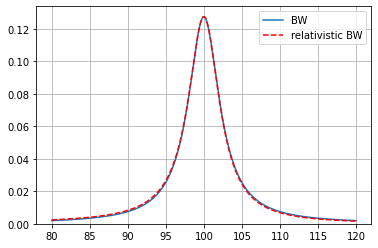

In [18]:
# Compare relativistic and non-relativistic versions
ax = plt.subplot(111)
ax.plot(x, voigt_profile(x-mass, 0, width/2), label="BW")
ax.plot(x, BW(x,mass,width), label="relativistic BW", color='red', linestyle="--")
ax.grid()
ax.legend()
_ = ax.set_ylim(bottom=0)

In [ ]:
# Sanity check that the voigt_profile with sigma=0 is what I think it is
ax=plt.subplot(111)
ax.plot(x, 1 - nonR_BW(x,mass,width)/voigt_profile(x-mass, 0, width/2) )
ax.grid()
# ax.legend()
_ = ax.set_ylim(-0.01,0.01)

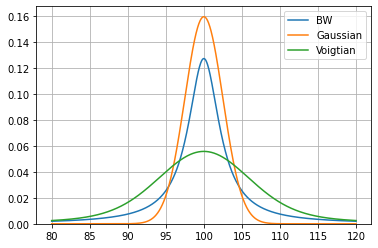

In [21]:
# Compare BW, gaussian, Voigtian

ax = plt.subplot(111)
x  = np.linspace(max(0,mass-4*width), mass+4*width, 1000)
ax.plot(x, voigt_profile(x-mass, 0, width/2),     label="BW")
ax.plot(x, norm.pdf(x, scale=width/2, loc=mass),  label="Gaussian")
ax.plot(x, voigt_profile(x-mass, sigma, width/2), label="Voigtian")
ax.grid()
ax.legend()
_ = ax.set_ylim(bottom=0)